### Fake news detection (Sprint1 - version1)

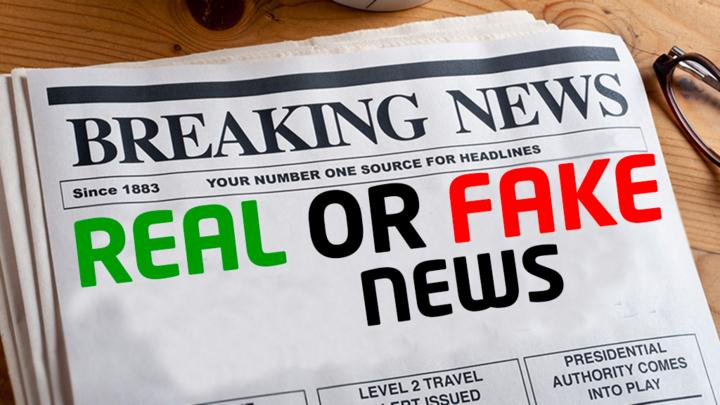

# Import the Dependencies

In [4]:
import pandas as pd
import numpy as np

import re
import string
import nltk
import pickle
# nltk.download("stopwords")
from nltk.corpus import stopwords
from nltk.stem.porter import PorterStemmer
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.model_selection import train_test_split 
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import classification_report
from sklearn.metrics import accuracy_score
from sklearn.ensemble import VotingClassifier

# Load the data

In [4]:
# Loading the fake/true dataset to a pandas DataFrame
df_fake=pd.read_csv("data/Fake.csv")
df_true=pd.read_csv("data/True.csv")
news_dataset=pd.read_csv("data/train.csv")

# Data pre-processing

#### Stopwords

In [5]:
# print the stopwords in English
print(stopwords.words('english'))

['i', 'me', 'my', 'myself', 'we', 'our', 'ours', 'ourselves', 'you', "you're", "you've", "you'll", "you'd", 'your', 'yours', 'yourself', 'yourselves', 'he', 'him', 'his', 'himself', 'she', "she's", 'her', 'hers', 'herself', 'it', "it's", 'its', 'itself', 'they', 'them', 'their', 'theirs', 'themselves', 'what', 'which', 'who', 'whom', 'this', 'that', "that'll", 'these', 'those', 'am', 'is', 'are', 'was', 'were', 'be', 'been', 'being', 'have', 'has', 'had', 'having', 'do', 'does', 'did', 'doing', 'a', 'an', 'the', 'and', 'but', 'if', 'or', 'because', 'as', 'until', 'while', 'of', 'at', 'by', 'for', 'with', 'about', 'against', 'between', 'into', 'through', 'during', 'before', 'after', 'above', 'below', 'to', 'from', 'up', 'down', 'in', 'out', 'on', 'off', 'over', 'under', 'again', 'further', 'then', 'once', 'here', 'there', 'when', 'where', 'why', 'how', 'all', 'any', 'both', 'each', 'few', 'more', 'most', 'other', 'some', 'such', 'no', 'nor', 'not', 'only', 'own', 'same', 'so', 'than', '

In [163]:
df_fake.head(5)

,title,text,subject,date,class
0,Donald Trump Sends Out Embarrassing New Year’...,Donald Trump just couldn t wish all Americans ...,News,"December 31, 2017",1
1,Drunk Bragging Trump Staffer Started Russian ...,House Intelligence Committee Chairman Devin Nu...,News,"December 31, 2017",1
2,Sheriff David Clarke Becomes An Internet Joke...,"On Friday, it was revealed that former Milwauk...",News,"December 30, 2017",1
3,Trump Is So Obsessed He Even Has Obama’s Name...,"On Christmas day, Donald Trump announced that ...",News,"December 29, 2017",1
4,Pope Francis Just Called Out Donald Trump Dur...,Pope Francis used his annual Christmas Day mes...,News,"December 25, 2017",1


In [162]:
df_true.head(5)

,title,text,subject,date,class
0,"As U.S. budget fight looms, Republicans flip t...",WASHINGTON (Reuters) - The head of a conservat...,politicsNews,"December 31, 2017",0
1,U.S. military to accept transgender recruits o...,WASHINGTON (Reuters) - Transgender people will...,politicsNews,"December 29, 2017",0
2,Senior U.S. Republican senator: 'Let Mr. Muell...,WASHINGTON (Reuters) - The special counsel inv...,politicsNews,"December 31, 2017",0
3,FBI Russia probe helped by Australian diplomat...,WASHINGTON (Reuters) - Trump campaign adviser ...,politicsNews,"December 30, 2017",0
4,Trump wants Postal Service to charge 'much mor...,SEATTLE/WASHINGTON (Reuters) - President Donal...,politicsNews,"December 29, 2017",0


In [171]:
news_dataset.head()

,id,title,author,text,class,content
0,0,House Dem Aide: We Didn’t Even See Comey’s Let...,Darrell Lucus,House Dem Aide: We Didn’t Even See Comey’s Let...,1,darrel lucu hous dem aid even see comey letter...
1,1,"FLYNN: Hillary Clinton, Big Woman on Campus - ...",Daniel J. Flynn,Ever get the feeling your life circles the rou...,0,daniel j flynn flynn hillari clinton big woman...
2,2,Why the Truth Might Get You Fired,Consortiumnews.com,"Why the Truth Might Get You Fired October 29, ...",1,consortiumnew com truth might get fire
3,3,15 Civilians Killed In Single US Airstrike Hav...,Jessica Purkiss,Videos 15 Civilians Killed In Single US Airstr...,1,jessica purkiss civilian kill singl us airstri...
4,4,Iranian woman jailed for fictional unpublished...,Howard Portnoy,Print \nAn Iranian woman has been sentenced to...,1,howard portnoy iranian woman jail fiction unpu...


#### Filling null value

In [172]:
# counting the number of minssing values in the datasets
news_dataset.isnull().sum()

id         0
title      0
author     0
text       0
class      0
content    0
dtype: int64

In [173]:
# replacing the null values with empty string
# news_dataset = news_dataset.drop(["title", "author"], axis=1)
# news_dataset["text"] = news_dataset["text"].fillna("No text available")
# print(news_dataset.isnull().sum())

news_dataset=news_dataset.fillna('')

In [174]:
print(news_dataset.isnull().sum())

id         0
title      0
author     0
text       0
class      0
content    0
dtype: int64


In [175]:
# mering the author and title 
news_dataset['text']=news_dataset['author']+' '+news_dataset['text']

In [176]:
print(news_dataset['text'])

0        Darrell Lucus House Dem Aide: We Didn’t Even S...
1        Daniel J. Flynn Ever get the feeling your life...
2        Consortiumnews.com Why the Truth Might Get You...
3        Jessica Purkiss Videos 15 Civilians Killed In ...
4        Howard Portnoy Print \nAn Iranian woman has be...
                               ...                        
20795    Jerome Hudson Rapper T. I. unloaded on black c...
20796    Benjamin Hoffman When the Green Bay Packers lo...
20797    Michael J. de la Merced and Rachel Abrams The ...
20798    Alex Ansary NATO, Russia To Hold Parallel Exer...
20799    David Swanson   David Swanson is an author, ac...
Name: text, Length: 20800, dtype: object


In [178]:
# separating data & lable
X=news_dataset.drop(columns='class',axis=1)
Y=news_dataset['class']

In [179]:
X.head()

,id,title,author,text,content
0,0,House Dem Aide: We Didn’t Even See Comey’s Let...,Darrell Lucus,Darrell Lucus House Dem Aide: We Didn’t Even S...,darrel lucu hous dem aid even see comey letter...
1,1,"FLYNN: Hillary Clinton, Big Woman on Campus - ...",Daniel J. Flynn,Daniel J. Flynn Ever get the feeling your life...,daniel j flynn flynn hillari clinton big woman...
2,2,Why the Truth Might Get You Fired,Consortiumnews.com,Consortiumnews.com Why the Truth Might Get You...,consortiumnew com truth might get fire
3,3,15 Civilians Killed In Single US Airstrike Hav...,Jessica Purkiss,Jessica Purkiss Videos 15 Civilians Killed In ...,jessica purkiss civilian kill singl us airstri...
4,4,Iranian woman jailed for fictional unpublished...,Howard Portnoy,Howard Portnoy Print \nAn Iranian woman has be...,howard portnoy iranian woman jail fiction unpu...


### Stemming :
Stemming is the process of reducing a word to its root word

In [180]:
news_dataset['text']=news_dataset['text'].apply(preprocess_text)
news_dataset['text']=news_dataset['text'].apply(stem_and_filter)

In [181]:
print(news_dataset['text'])

0        darrel lucu hous dem aid even see comey letter...
1        daniel j flynn ever get feel life circl rounda...
2        consortiumnew com truth might get fire octob t...
3        jessica purkiss video civilian kill singl us a...
4        howard portnoy print iranian woman sentenc six...
                               ...                        
20795    jerom hudson rapper unload black celebr met do...
20796    benjamin hoffman green bay packer lost washing...
20797    michael j de la merc rachel abram maci today g...
20798    alex ansari nato russia hold parallel exercis ...
20799    david swanson david swanson author activist jo...
Name: text, Length: 20800, dtype: object


In [182]:
# separating the data and label
X=news_dataset['text'].values
Y=news_dataset['class'].values

In [183]:
print(X)

['darrel lucu hous dem aid even see comey letter jason chaffetz tweet darrel lucu octob subscrib jason chaffetz stump american fork utah imag courtesi michael jolley avail creativ common licens apolog keith olbermann doubt worst person world week fbi director jame comey accord hous democrat aid look like also know second worst person well turn comey sent infam letter announc fbi look email may relat hillari clinton email server rank democrat relev committe hear comey found via tweet one republican committe chairmen know comey notifi republican chairmen democrat rank member hous intellig judiciari oversight committe agenc review email recent discov order see contain classifi inform long letter went oversight committe chairman jason chaffetz set polit world ablaz tweet fbi dir inform fbi learn exist email appear pertin investig case reopen jason chaffetz jasoninthehous octob cours know case comey actual say review email light unrel case know anthoni weiner sext teenag appar littl thing f

In [184]:
Y.shape

(20800,)

In [185]:
# convert textual data into numerical data
vectorizer = TfidfVectorizer() #Tf Idf, which counts the number of times a particular word is repeating in a document and assigns a particular numerical value to that word.
vectorizer.fit(X)
X=vectorizer.transform(X)
print(X)

  (0, 110303)	0.05150325118462089
  (0, 110254)	0.020120660810215164
  (0, 109365)	0.04648012814993065
  (0, 109361)	0.09976901823372553
  (0, 109318)	0.039753999913665794
  (0, 109281)	0.01191606463221738
  (0, 108648)	0.018094873681171957
  (0, 107859)	0.018006771521990657
  (0, 107768)	0.013197136308646851
  (0, 107678)	0.030609896372912285
  (0, 107602)	0.013554325898654775
  (0, 107418)	0.012421996925706344
  (0, 106576)	0.02719449715910857
  (0, 106543)	0.03297568845288497
  (0, 105546)	0.02273261780691444
  (0, 104124)	0.06862501176516554
  (0, 103451)	0.034761433851280034
  (0, 103195)	0.01723540658605056
  (0, 102427)	0.04003267902960768
  (0, 101801)	0.011681172144419697
  (0, 101791)	0.04536436742015041
  (0, 101741)	0.1198386005005126
  (0, 101601)	0.0751714522283139
  (0, 100335)	0.041331718903589915
  (0, 99775)	0.028469582275562535
  :	:
  (20799, 7669)	0.010706734870401314
  (20799, 7294)	0.02827963893066343
  (20799, 6976)	0.039722872984003676
  (20799, 6938)	0.0253928

In [186]:
# Splitting the dataset to training & test data 

X_train,X_test,Y_train,Y_test=train_test_split(X,Y,test_size=0.2,stratify=Y,random_state=2) 

# stratify=Y: This parameter ensures that the train/test split is performed in a stratified way based on the target variable Y，By setting stratify=Y, the train_test_split function ensures that both the training and testing sets have the same proportion of each class as the original dataset
# If random_state is not set, then the train/test split will be different each time the code is run,  

In [187]:
model=LogisticRegression()

In [188]:
# Training the Model ； Logistic regression modlue

model.fit(X_train,Y_train)

LogisticRegression()

#### Evaluation
Accuracy score




In [193]:
X_train_prediction=model.predict(X_train)
training_data_accuracy=accuracy_score(X_train_prediction,Y_train)
print("Accuracy score of the training data:", training_data_accuracy)

Accuracy score of the training data: 0.9760216346153846


In [194]:
X_test_prediction=model.predict(X_test)
testing_data_accuracy=accuracy_score(X_test_prediction,Y_test)
print("Accuracy score of the testing data:", testing_data_accuracy)

Accuracy score of the testing data: 0.9454326923076923


## True/Fake news datasets

In [6]:
df_fake["class"]=1
df_true["class"]=0

In [7]:
df_true.head(10)

,title,text,subject,date,class
0,"As U.S. budget fight looms, Republicans flip t...",WASHINGTON (Reuters) - The head of a conservat...,politicsNews,"December 31, 2017",0
1,U.S. military to accept transgender recruits o...,WASHINGTON (Reuters) - Transgender people will...,politicsNews,"December 29, 2017",0
2,Senior U.S. Republican senator: 'Let Mr. Muell...,WASHINGTON (Reuters) - The special counsel inv...,politicsNews,"December 31, 2017",0
3,FBI Russia probe helped by Australian diplomat...,WASHINGTON (Reuters) - Trump campaign adviser ...,politicsNews,"December 30, 2017",0
4,Trump wants Postal Service to charge 'much mor...,SEATTLE/WASHINGTON (Reuters) - President Donal...,politicsNews,"December 29, 2017",0
5,"White House, Congress prepare for talks on spe...","WEST PALM BEACH, Fla./WASHINGTON (Reuters) - T...",politicsNews,"December 29, 2017",0
6,"Trump says Russia probe will be fair, but time...","WEST PALM BEACH, Fla (Reuters) - President Don...",politicsNews,"December 29, 2017",0
7,Factbox: Trump on Twitter (Dec 29) - Approval ...,The following statements were posted to the ve...,politicsNews,"December 29, 2017",0
8,Trump on Twitter (Dec 28) - Global Warming,The following statements were posted to the ve...,politicsNews,"December 29, 2017",0
9,Alabama official to certify Senator-elect Jone...,WASHINGTON (Reuters) - Alabama Secretary of St...,politicsNews,"December 28, 2017",0


### split 10 fake news and 10 true news and merge them into a new datasets

In [8]:
df_fake.shape,df_true.shape

((23481, 5), (21417, 5))

In [9]:
df_fake_manual_testing=df_fake.tail(10)
for i in range(23480,23470,-1):
    df_fake.drop([i],axis=0,inplace=True)

df_true_manual_testing=df_true.tail(10)
for i in range(21416,21406,-1):
    df_true.drop([i],axis=0,inplace=True)


In [10]:
df_fake.shape,df_true.shape

((23471, 5), (21407, 5))

In [12]:
df_manual_testing=pd.concat([df_fake_manual_testing,df_true_manual_testing],axis=0)
df_manual_testing.to_csv("data/manual_testing.csv")

### merge two datasets

In [13]:
df_merge=pd.concat([df_fake,df_true],axis=0)
df_merge.head(10)

,title,text,subject,date,class
0,Donald Trump Sends Out Embarrassing New Year’...,Donald Trump just couldn t wish all Americans ...,News,"December 31, 2017",1
1,Drunk Bragging Trump Staffer Started Russian ...,House Intelligence Committee Chairman Devin Nu...,News,"December 31, 2017",1
2,Sheriff David Clarke Becomes An Internet Joke...,"On Friday, it was revealed that former Milwauk...",News,"December 30, 2017",1
3,Trump Is So Obsessed He Even Has Obama’s Name...,"On Christmas day, Donald Trump announced that ...",News,"December 29, 2017",1
4,Pope Francis Just Called Out Donald Trump Dur...,Pope Francis used his annual Christmas Day mes...,News,"December 25, 2017",1
5,Racist Alabama Cops Brutalize Black Boy While...,The number of cases of cops brutalizing and ki...,News,"December 25, 2017",1
6,"Fresh Off The Golf Course, Trump Lashes Out A...",Donald Trump spent a good portion of his day a...,News,"December 23, 2017",1
7,Trump Said Some INSANELY Racist Stuff Inside ...,In the wake of yet another court decision that...,News,"December 23, 2017",1
8,Former CIA Director Slams Trump Over UN Bully...,Many people have raised the alarm regarding th...,News,"December 22, 2017",1
9,WATCH: Brand-New Pro-Trump Ad Features So Muc...,Just when you might have thought we d get a br...,News,"December 21, 2017",1


### remove unecessary columes (tile, subjects, data)

In [14]:
df=df_merge.drop(["title","subject","date"],axis=1)
df.head(10)

,text,class
0,Donald Trump just couldn t wish all Americans ...,1
1,House Intelligence Committee Chairman Devin Nu...,1
2,"On Friday, it was revealed that former Milwauk...",1
3,"On Christmas day, Donald Trump announced that ...",1
4,Pope Francis used his annual Christmas Day mes...,1
5,The number of cases of cops brutalizing and ki...,1
6,Donald Trump spent a good portion of his day a...,1
7,In the wake of yet another court decision that...,1
8,Many people have raised the alarm regarding th...,1
9,Just when you might have thought we d get a br...,1


In [15]:
df=df.sample(frac=1)

In [16]:
df.head(10)

,text,class
10381,CLEVELAND (Reuters) - An Ohio judge ruled Frid...,0
7621,Donald Trump pretty much goes ballistic anytim...,1
19642,WASHINGTON (Reuters) - The United States hopes...,0
16370,Hillary Clinton is the last person you want pl...,1
8230,WASHINGTON (Reuters) - Libertarian Party presi...,0
6722,CHICAGO/WASHINGTON (Reuters) - U.S. President-...,0
14835,The drip drip drip of communism Leftists are s...,1
17610,As more and more women line up to tell their s...,1
14819,"What does Obama, the Democrat Party, the state...",1
11339,FOX News Neil Cavuto asked Senator Rand Paul ...,1


In [17]:
df.isnull().sum()

text     0
class    0
dtype: int64

### remove unnecessary character and link

In [6]:
# 将文本转换为小写，并去除网址、标签、标点符号、数字
def preprocess_text(text):
    text = text.lower()
    text = re.sub('\[.*?\]', '', text) #\[: 匹配左方括号，\是转义字符，因为方括号在正则表达式中是特殊字符，需要转义。
                                       # .*?: 匹配任意字符（除了换行符）0次或多次，?表示匹配最少的次数，即非贪婪匹配。
                                       # \]: 匹配右方括号。
    text = re.sub("\\W"," ",text) # 匹配任何非字母、数字、下划线的字符，\是转义字符，因为\W在正则表达式中是特殊字符，需要转义。
    text = re.sub('https?://\S+|www\.\S+', '', text) #re.sub(r'http\S+', '', text)
    text = re.sub('<.*?>+', '', text) #将文本中的HTML标签全部删除，这样可以将一些网页标签信息替换掉。
    text = re.sub('[%s]' % re.escape(string.punctuation), '', text) #将文本中的标点符号全部替换成空格，这样可以将一些标点符号替换掉。
    text = re.sub('\n', '', text) #将文本中的换行符全部删除，这样可以将一些换行符替换掉。
    text = re.sub('\w*\d\w*', '', text)     #将文本中的数字全部删除，这样可以将一些数字替换掉。
    return text

In [7]:
# 进行词干提取和停用词过滤
def stem_and_filter(text):
    stemmer = PorterStemmer()
    stop_words = set(stopwords.words('english'))
    words = nltk.word_tokenize(text)
    filtered_words = [stemmer.stem(word) for word in words if word not in stop_words]
    return ' '.join(filtered_words)

In [20]:
# 预处理文本
df["text"]=df["text"].apply(preprocess_text)
df["text"]=df["text"].apply(stem_and_filter)

# 将标签转换为数字
# data['label'] = data['label'].map({'REAL': 1, 'FAKE': 0})

df.head(10)

,text,class
10381,cleveland reuter ohio judg rule friday teenag ...,0
7621,donald trump pretti much goe ballist anytim so...,1
19642,washington reuter unit state hope find diploma...,0
16370,hillari clinton last person want place target ...,1
8230,washington reuter libertarian parti presidenti...,0
6722,chicago washington reuter u presid elect donal...,0
14835,drip drip drip commun leftist steal right free...,1
17610,women line tell stori sex bill clinton consens...,1
14819,obama democrat parti state run media faux cons...,1
11339,fox news neil cavuto ask senat rand paul belie...,1


In [21]:
# 划分训练集和测试集
x=df["text"]
y=df["class"]
x_train, x_test, y_train, y_test=train_test_split(x,y,test_size=.25, random_state=2)

### text extraction

In [22]:
# 计算TF-IDF值
vectorization= TfidfVectorizer()
xv_train=vectorization.fit_transform(x_train)
xv_test=vectorization.transform(x_test)

### build machine learning modules

#### 1. Logistic Regression

In [23]:
from sklearn.linear_model import LogisticRegression

In [24]:
LR = LogisticRegression()
LR.fit(xv_train,y_train)

LogisticRegression()

In [26]:
LR.score(xv_test,y_test)

0.9842245989304813

In [27]:
pred_LR=LR.predict(xv_test)

In [28]:
print(classification_report(y_test,pred_LR))

              precision    recall  f1-score   support

           0       0.98      0.99      0.98      5389
           1       0.99      0.98      0.98      5831

    accuracy                           0.98     11220
   macro avg       0.98      0.98      0.98     11220
weighted avg       0.98      0.98      0.98     11220



### 2. Decision Tree Classification

In [29]:
from sklearn.tree import DecisionTreeClassifier

In [30]:
DT = DecisionTreeClassifier()
DT.fit(xv_train, y_train)

DecisionTreeClassifier()

In [31]:
pred_dt = DT.predict(xv_test)

In [32]:
DT.score(xv_test, y_test)

0.9950980392156863

In [33]:
print(classification_report(y_test, pred_dt))

              precision    recall  f1-score   support

           0       1.00      0.99      0.99      5389
           1       1.00      1.00      1.00      5831

    accuracy                           1.00     11220
   macro avg       1.00      1.00      1.00     11220
weighted avg       1.00      1.00      1.00     11220



### 3. Random Forest Classifier

In [34]:
from sklearn.ensemble import RandomForestClassifier

In [35]:
RFC = RandomForestClassifier(random_state=0)
RFC.fit(xv_train, y_train)

RandomForestClassifier(random_state=0)

In [36]:
pred_rfc = RFC.predict(xv_test)

In [37]:
RFC.score(xv_test, y_test)

0.99126559714795

In [38]:
print(classification_report(y_test, pred_rfc))

              precision    recall  f1-score   support

           0       0.99      0.99      0.99      5389
           1       0.99      0.99      0.99      5831

    accuracy                           0.99     11220
   macro avg       0.99      0.99      0.99     11220
weighted avg       0.99      0.99      0.99     11220



### 3. Gradient Boosting Classifier

In [39]:
from sklearn.ensemble import GradientBoostingClassifier

In [40]:
GBC = GradientBoostingClassifier(random_state=0)
GBC.fit(xv_train, y_train)

GradientBoostingClassifier(random_state=0)

In [41]:
pred_gbc = GBC.predict(xv_test)

In [42]:
GBC.score(xv_test, y_test)

0.9949197860962566

In [43]:
print(classification_report(y_test, pred_gbc))

              precision    recall  f1-score   support

           0       0.99      1.00      0.99      5389
           1       1.00      0.99      1.00      5831

    accuracy                           0.99     11220
   macro avg       0.99      1.00      0.99     11220
weighted avg       0.99      0.99      0.99     11220



### Ensemble learning
#### Soft Voting 

In [44]:
voting_clf = VotingClassifier(estimators=[('rf', RFC), ('dt', DT), ('lr', LR),('GBC',GBC)], voting='soft')


In [45]:
voting_clf.fit(xv_train, y_train)

VotingClassifier(estimators=[('rf', RandomForestClassifier(random_state=0)),
                             ('dt', DecisionTreeClassifier()),
                             ('lr', LogisticRegression()),
                             ('GBC',
                              GradientBoostingClassifier(random_state=0))],
                 voting='soft')

In [46]:
print("Accuracy:", voting_clf.score(xv_test, y_test))

Accuracy: 0.9978609625668449


# Saving the trained model

In [156]:
import pickle

In [47]:
pickle.dump(LR, open("model/trained_model_LR.sav",'wb'))
pickle.dump(DT, open("model/trained_model_DT.sav",'wb'))
pickle.dump(RFC, open("model/trained_model_RFC.sav",'wb'))
pickle.dump(GBC, open("model/trained_model_GBC.sav",'wb'))
pickle.dump(voting_clf, open("model/trained_model_voting.sav",'wb'))
pickle.dump(vectorization, open("model/vectorization.pickle", "wb"))

### Loading the saved model

In [10]:
loaded_model_LR=pickle.load(open("model/trained_model_LR.sav",'rb'))
loaded_model_DT=pickle.load(open("model/trained_model_DT.sav",'rb'))
loaded_model_RFC=pickle.load(open("model/trained_model_RFC.sav",'rb'))
loaded_model_GBC=pickle.load(open("model/trained_model_GBC.sav",'rb'))
loaded_model_voting=pickle.load(open("model/trained_model_voting.sav",'rb'))
loaded_vectorization = pickle.load(open("model/vectorization.pickle", "rb"))

# Model Testing With Manual Entry


In [2]:
def output_lable(n):
    if n == 1:
        return "Fake News"
    elif n == 0:
        return "Real News"

def manual_testing_voting(news):
    testing_news = {"text":[news]}
    new_def_test = pd.DataFrame(testing_news)
    
    new_def_test["text"]=new_def_test["text"].apply(preprocess_text)
    new_def_test["text"]=new_def_test["text"].apply(stem_and_filter)

    new_x_test = new_def_test["text"]
    new_xv_test = loaded_vectorization.transform(new_x_test)

    # 创建投票分类器对象
   # voting_clf = VotingClassifier(estimators=[('lr', LR), ('dt', DT), ('rfc', RFC)], voting='soft')
   # voting_clf.fit(xv_train, y_train)
    
    # 对新闻进行预测
    pred_voting = loaded_model_voting.predict(new_xv_test)
    pred_LR = loaded_model_LR.predict(new_xv_test)
    pred_DT = loaded_model_DT.predict(new_xv_test)
    pred_RFC = loaded_model_RFC.predict(new_xv_test)
    pred_GBC = loaded_model_GBC.predict(new_xv_test)

    # 输出各分类器的预测结果
    return print("\n\nLR Prediction: {} \nDT Prediction: {} \nRFC Prediction: {} \nGBC Prediction: {} \nVoting Classifier Prediction: {}".format(
        output_lable(pred_LR[0]), output_lable(pred_DT[0]), output_lable(pred_RFC[0]),output_lable(pred_GBC[0]), output_lable(pred_voting[0])))


In [11]:
news = str(input())
manual_testing_voting(news)

SAO PAULO (Reuters) - Cesar Mata Pires, the owner and co-founder of Brazilian engineering conglomerate OAS SA, one of the largest companies involved in Brazil s corruption scandal, died on Tuesday. He was 68. Mata Pires died of a heart attack while taking a morning walk in an upscale district of S o Paulo, where OAS is based, a person with direct knowledge of the matter said. Efforts to contact his family were unsuccessful. OAS declined to comment. The son of a wealthy cattle rancher in the northeastern state of Bahia, Mata Pires  links to politicians were central to the expansion of OAS, which became Brazil s No. 4 builder earlier this decade, people familiar with his career told Reuters last year. His big break came when he befriended Antonio Carlos Magalh es, a popular politician who was Bahia governor several times, and eventually married his daughter Tereza. Brazilians joked that OAS stood for  Obras Arranjadas pelo Sogro  - or  Work Arranged by the Father-In-Law.   After years of